# <p style="text-align: center;"> Final Project - Introduction to Data Science</p>
# <p style="text-align: center;"> <b> Data Exploration: Gain Insight From Data </b></p>
---

## Member Information
| Name              | ID       |
|-------------------|----------|
|Tran Dinh Quang    | 21127406 |
|Nguyen Hong Hanh   | 21127503 |
|Do Quoc Tri  | 21127556 |
| Nguyen Khanh Nhan | 21127657         |


## Table of contents
- [1. Import libraries](#1-import-libaries)
- [2. Basic information](#2-basic-information)
    - [2.1. Context](#21-context-of-the-data)
    - [2.2. Meaning of each column](#22-the-meaning-of-each-column)
- [3. Specific information](#3-specific-information-about-the-dataset)
    - [3.1. Number of rows and columns](#31-rows-and-columns)
    - [3.2. Datatype](#32-column-datatype)
- [4. Data quality check](#4-data-quality-check)
    - [4.1. Duplicate rows](#41-count-duplicate-rows)
    - [4.2. Missing values per row](#42-count-the-number-of-missing-values-per-row)
    - [4.3. Missing values per column](#43-count-the-number-of-missing-values-per-column)
- [5. Data distribution analysis](#5-data-distribution-analysis)
    - [5.1. Numerical and Category columns](#51-split-the-dataset-into-2-parts-numerical-and-categorical-data)
    - [5.2. Numerical data](#52-numerical-data)
    - [5.3. Categorical data](#53-categorical-data)
    - [5.4. Abnormal data and outlier](#54-abnormal-data-and-outliers)
- [6. Correlation analysis](#6-correlation-analysis)
---

## 1. Import libaries

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

**Constants**

In [2]:
RAW_FILE_PATH = '../data/raw.csv'   # path to raw data .csv file (1)
COL_MISSING_DROP_RATE = 0.33        # to drop columns having many missing values (2)

## 2. Basic Information


### 2.1 Context of the data
| Location          | Value                               |
|-----------|-------------------------------------|
| Latitude  | 10.7764                             |
| Longitude | 106.701                             |
| Address   | Quan 1, Ho Chi Minh, Viet Nam, Asia |
| Timezone  | Asia/Ho Chi Minh city               |
|Date start | 27/9/2009                          |
|Date end   | 5/6/2023                          |
 


### 2.2 The meaning of each column

| Column           | Meaning                                                                                                                                                                                                                                                                                                                                                                                                                                 |
|------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `datetime`       | ISO 8601 formatted date, time or datetime value indicating the date and time of the weather data in the local time zone of the requested location. See Dates and Times in the Weather API for more information.                                                                                                                                                                                                                         |
| `datetimeEpoch`  | Number of seconds since 1st January 1970 in UTC time.                                                                                                                                                                                                                                                                                                                                                                                   |
| `tempmax`        | Maximum temperature at the location (&deg;F).                                                                                                                                                                                                                                                                                                                                                                                           |
| `tempmin`        | Minimum temperature at the location (&deg;F).                                                                                                                                                                                                                                                                                                                                                                                           |
| `temp`           | Average temperature at the location in day (&deg;F).                                                                                                                                                                                                                                                                                                                                                                                    |
| `feelslikemax`   | Maximum feels like temperature at the location.                                                                                                                                                                                                                                                                                                                                                                                         |
| `feelslikemin`   | Minimum feels like temperature at the location.                                                                                                                                                                                                                                                                                                                                                                                         |
| `feelslike`      | What the temperature feels like accounting for heat index or wind chill. Daily values are average values (mean) for the day.                                                                                                                                                                                                                                                                                                            |
| `dew`            | Dew point temperature                                                                                                                                                                                                                                                                                                                                                                                                                   |
| `humidity`       | Relative humidity in \%                                                                                                                                                                                                                                                                                                                                                                                                                 |
| `precip`         | The amount of liquid precipitation that fell or is predicted to fall in the period. This includes the liquid-equivalent amount of any frozen precipitation such as snow or ice.                                                                                                                                                                                                                                                         |
| `precipprob`     | The likelihood of measurable precipitation ranging from 0% to 100%.                                                                                                                                                                                                                                                                                                                                                         |
| `precipcover`    | The proportion of hours where there was non-zero precipitation.                                                                                                                                                                                                                                                                                                                                                                         |
| `preciptype`     | An array indicating the type(s) of precipitation expected or that occurred. Possible values include rain, snow, freezingrain and ice.                                                                                                                                                                                                                                                                                                   |
| `snow`           | The amount of snow that fell or is predicted to fall.                                                                                                                                                                                                                                                                                                                                                                                   |
| `snowdepth`      | The depth of snow on the ground.                                                                                                                                                                                                                                                                                                                                                                                                        |
| `windgust`       | Instantaneous wind speed at a location – May be empty if it is not significantly higher than the wind speed. Daily values are the maximum hourly value for the day.                                                                                                                                                                                                                                                                     |
| `windspeed`      | The sustained wind speed measured as the average windspeed that occurs during the preceding one to two minutes. Daily values are the maximum hourly value for the day.                                                                                                                                                                                                                                                                  |
| `winddir`        | Direction from which the wind is blowing.                                                                                                                                                                                                                                                                                                                                                                                               |
| `pressure`       | The sea level atmospheric or barometric pressure in millibars (or hectopascals).                                                                                                                                                                                                                                                                                                                                                        |
| `cloudcover`     | How much of the sky is covered in cloud ranging from 0-100 \%.                                                                                                                                                                                                                                                                                                                                                                          |
| `visibility`     | Distance at which distant objects are visible.                                                                                                                                                                                                                                                                                                                                                                                          |
| `solarradiation` | $(\frac{W}{m^2})$ the solar radiation power at the instantaneous moment of the observation (or forecast prediction).                                                                                                                                                                                                                                                                                                                    |
| `solarenergy`    | $(\frac{MJ}{m^2})$ indicates the total energy from the sun that builds up over an hour or day.                                                                                                                                                                                                                                                                                                                                          |
| `uvindex`        | A value between 0 and 10 indicating the level of ultra violet (UV) exposure for that hour or day. 10 represents high level of exposure, and 0 represents no exposure. The UV index is calculated based on amount of short wave solar radiation which in turn is a level the cloudiness, type of cloud, time of day, time of year and location altitude. Daily values represent the maximum value of the hourly values                   |
| `sunrise`        | The formatted time of the sunrise (For example “2022-05-23T05:50:40”).                                                                                                                                                                                                                                                                                                                                                                  |
| `sunriseEpoch`   | Sunrise time specified as number of seconds since 1st January 1970 in UTC time                                                                                                                                                                                                                                                                                                                                                          |
| `sunset`         | The formatted time of the sunset (For example “2022-05-23T20:22:29”)                                                                                                                                                                                                                                                                                                                                                                    |
| `sunsetEpoch`    | Sunset time specified as number of seconds since 1st January 1970 in UTC time.                                                                                                                                                                                                                                                                                                                                                          |
| `moonphase`      | Represents the fractional portion through the current moon lunation cycle ranging from 0 (the new moon) to 0.5 (the full moon) and back to 1 (the next new moon).                                                                                                                                                                                                                                                                       |
| `conditions`     | Textual representation of the weather conditions.                                                                                                                                                                                                                                                                                                                                                                                       |
| `description`    | Longer text descriptions suitable for displaying in weather displays. The descriptions combine the main features of the weather for the day such as precipitation or amount of cloud cover. Daily descriptions are provided for historical and forecast days. When the timeline request includes the model forecast period, a seven day outlook description is provided at the root response level.                                     |
| `icon`           | A fixed, machine readable summary that can be used to display an icon.                                                                                                                                                                                                                                                                                                                                                                  |
| `stations`       | The weather stations used when collecting an historical observation record.                                                                                                                                                                                                                                                                                                                                                             |
| `source`         | The type of weather data used for this weather object. – Values include historical observation (“obs”), forecast (“fcst”), historical forecast (“histfcst”) or statistical forecast (“stats”). If multiple types are used in the same day, “comb” is used. Today a combination of historical observations and forecast data.                                                                                                            |
| `severerisk`     | A value between 0 and 100 representing the risk of convective storms (e.g. thunderstorms, hail and tornadoes). Severe risk is a scaled measure that combines a variety of other fields such as the convective available potential energy (CAPE) and convective inhibition (CIN), predicted rain and wind. Typically, a severe risk value less than 30 indicates a low risk, between 30 and 70 a moderate risk and above 70 a high risk. |

## 3. Specific information about the dataset

### 3.1 Rows and Columns

In [3]:
# Read raw data
raw_data = pd.read_csv(RAW_FILE_PATH)
print(f'This data has {raw_data.shape[0]} rows and {raw_data.shape[1]} columns')

This data has 5000 rows and 36 columns


### 3.2 Column Datatype

In [4]:
# Checking datatype
raw_data.dtypes

datetime           object
datetimeEpoch       int64
tempmax           float64
tempmin           float64
temp              float64
feelslikemax      float64
feelslikemin      float64
feelslike         float64
dew               float64
humidity          float64
precip            float64
precipprob        float64
precipcover       float64
preciptype         object
snow              float64
snowdepth         float64
windgust          float64
windspeed         float64
winddir           float64
pressure          float64
cloudcover        float64
visibility        float64
solarradiation    float64
solarenergy       float64
uvindex           float64
sunrise            object
sunriseEpoch        int64
sunset             object
sunsetEpoch         int64
moonphase         float64
conditions         object
description        object
icon               object
stations           object
source             object
severerisk        float64
dtype: object

- There are:
    - `9` columns with `object` datatype.
    - `3` columns with `int64` datatype.
    - `24` columns with `float64` datatype.

Unsuitable datatype features: `datetime`, `sunrise` and `sunset`.
- `datetime` should be `datetime` datatype.
- `sunrise` and `sunset` should be represented as the number of seconds that have elapsed since midnight.

In [5]:
# Handle 'datetime' column from str -> datetime
raw_data['datetime'] = pd.to_datetime(raw_data['datetime'], format="%Y-%m-%d")

# Handle 'sunrise' and 'sunset' columns from str -> int (seconds after midnight)
raw_data['sunrise'] = pd.to_timedelta(raw_data['sunrise']).dt.total_seconds()
raw_data['sunset'] = pd.to_timedelta(raw_data['sunset']).dt.total_seconds()

In [6]:
# check again
raw_data.dtypes

datetime          datetime64[ns]
datetimeEpoch              int64
tempmax                  float64
tempmin                  float64
temp                     float64
feelslikemax             float64
feelslikemin             float64
feelslike                float64
dew                      float64
humidity                 float64
precip                   float64
precipprob               float64
precipcover              float64
preciptype                object
snow                     float64
snowdepth                float64
windgust                 float64
windspeed                float64
winddir                  float64
pressure                 float64
cloudcover               float64
visibility               float64
solarradiation           float64
solarenergy              float64
uvindex                  float64
sunrise                  float64
sunriseEpoch               int64
sunset                   float64
sunsetEpoch                int64
moonphase                float64
conditions

## 4. Data Quality Check


### 4.1 Count duplicate rows

In [7]:
# Check for duplicate rows
duplicates_series = raw_data.duplicated()

print(f'The data has {sum(duplicates_series)} duplicate rows.')
if sum(duplicates_series) > 0:
    print(f'The duplicate rows are: {[i for i, d in enumerate(duplicates_series) if d == True]}')

The data has 0 duplicate rows.


- Luckily, there is **no duplicate row** in the dataset. So we don't need to drop any duplicated row.

### 4.2 Count the number of missing values per row
"`Empty values (or null values)` are used within the data set to `indicate an absence of data`, such as `missing` weather information or `unknown` data. They are `not used to indicate a zero value`. For example, an unknown precipitation value will be marked as empty or null. A zero amount of precipitation will be indicated by the value zero."

https://www.visualcrossing.com/resources/documentation/weather-data/weather-data-documentation/

In [8]:
# Count the number of missing values in each row
missing_values_per_row = raw_data.isnull().sum(axis=1)

# Count the number of rows for each count of missing values
count_of_missing_values = missing_values_per_row.value_counts().sort_index()

# Dcount_of_missing_values
for missing_count, row_count in count_of_missing_values.items():
    print(f"The number of rows missing {missing_count} values: {row_count} rows ({round(row_count * 100.0 / raw_data.shape[0])}%).")

print(f'\nThe number of rows with missing data: {sum(count_of_missing_values[1:])} ({sum(count_of_missing_values[1:]) * 100.0 / raw_data.shape[0]})%')

The number of rows missing 0 values: 369 rows (7%).
The number of rows missing 1 values: 143 rows (3%).
The number of rows missing 3 values: 356 rows (7%).
The number of rows missing 4 values: 2611 rows (52%).
The number of rows missing 5 values: 1424 rows (28%).
The number of rows missing 6 values: 1 rows (0%).
The number of rows missing 9 values: 96 rows (2%).

The number of rows with missing data: 4631 (92.62)%


**Comment**: <br>
- Almost all rows have missing values `(92.62%)`.
- Very few rows do not have any missing values `(7%)`.
- Most rows have `4` missing value `(52%)`.
- The most missing values in a row is `9`, a quarter of the total values that each row has so this still be **OK**.

### 4.3 Count the number of missing values per column

In [33]:
# Count the number of missing values for each column
missing_values_per_column = raw_data.isnull().sum()
# Convert to percentage
missing_values_per_column_percent = missing_values_per_column / raw_data.shape[0]

- Specific information about the number of missing values for each column.

snow              4488
snowdepth         4488
severerisk        4488
windgust          3935
preciptype        1861
precip              96
solarradiation      96
solarenergy         96
uvindex             96
pressure             1
dtype: int64


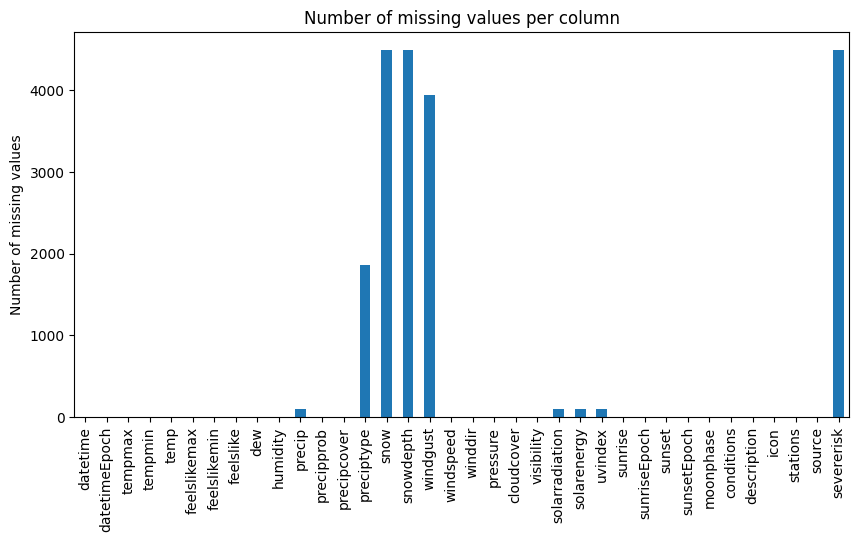

In [41]:
print(missing_values_per_column[missing_values_per_column > 0].sort_values(ascending=False))
fig, ax = plt.subplots(figsize=(10, 5))
missing_values_per_column.plot.bar(ax=ax)
ax.set_ylabel('Number of missing values')
ax.set_title('Number of missing values per column')
plt.show()

- The percentage of missing values in each column (\%).

snow              0.8976
snowdepth         0.8976
severerisk        0.8976
windgust          0.7870
preciptype        0.3722
precip            0.0192
solarradiation    0.0192
solarenergy       0.0192
uvindex           0.0192
pressure          0.0002
dtype: float64


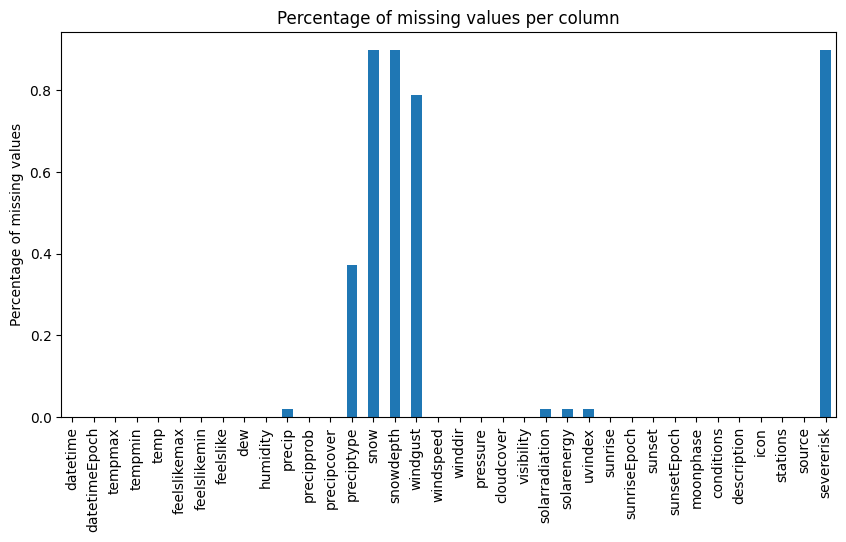

In [43]:
print(missing_values_per_column_percent[missing_values_per_column_percent > 0].sort_values(ascending=False))
fig, ax = plt.subplots(figsize=(10, 5))
missing_values_per_column_percent.plot.bar(ax=ax)
ax.set_ylabel('Percentage of missing values')
ax.set_title('Percentage of missing values per column')
plt.show()

- Columns that have a number of missing values exceeding the `allowable threshold`  (> `33` \%).

In [47]:
# define COL_MISSING_DROP_RATE in 'Define constants' rather than below.
#COL_MISSING_DROP_RATE =
print(f'\nColumns with more than {COL_MISSING_DROP_RATE*100}% missing values:')
q = "'"
for col, percent in missing_values_per_column_percent.items():
    if percent >= COL_MISSING_DROP_RATE:
        print(f'\t- Column {(q+col+q).ljust(12)} is missing {round(percent*100)}% of values.')


Columns with more than 33.0% missing values:
	- Column 'preciptype' is missing 37% of values.
	- Column 'snow'       is missing 90% of values.
	- Column 'snowdepth'  is missing 90% of values.
	- Column 'windgust'   is missing 79% of values.
	- Column 'severerisk' is missing 90% of values.


**Comment:** <br>
  - There are total `10` columns that have missing values.
  - `Severerisk`, `snow` and `snowdepth` have the highest percentage of missing values, which is `90%`.
  - Among them, there are `5` columns that have a number of missing values **exceeding the allowable threshold**: `preciptype`, `snowdepth`, `snow`, `windgust` and `severerisk`. Therefore, in `preprocessing phase` we will **delete** these columns instead of filling them in.


**We should remove these columns before performing statistical calculations to delve deeper into the analysis**

In [52]:
# Storing the columns' names (for COPY + PASTE)
col_to_drop_name = [col for col, percent in missing_values_per_column_percent.items() if percent >= COL_MISSING_DROP_RATE]
raw_data.drop(columns=col_to_drop_name, inplace=True)

## 5. Data Distribution Analysis

### 5.1 Split the dataset into 2 parts: `numerical` and `categorical` data

In [53]:
# Spliting the data into numeric and categorical
raw_data_numeric = raw_data.select_dtypes(include='number')
raw_data_categorical = raw_data.select_dtypes(exclude='number')

In [54]:
raw_data_numeric.columns

Index(['datetimeEpoch', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'windspeed', 'winddir', 'pressure', 'cloudcover',
       'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'sunrise',
       'sunriseEpoch', 'sunset', 'sunsetEpoch', 'moonphase'],
      dtype='object')

In [55]:
raw_data_categorical.columns

Index(['datetime', 'conditions', 'description', 'icon', 'stations', 'source'], dtype='object')

### 5.2 Numerical data

#### Descriptive statistics

In [60]:
from summarytools import dfSummary
dfSummary(raw_data_numeric)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,datetimeEpoch[int64],Mean (sd) : 1469941200.0 (124720128.3)min < med < max:1253984400.0 < 1469941200.0 < 1685898000.0IQR (CV) : 215956800.0 (11.8),"5,000 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/SrBM8AAAACXBIWXMAAA9hAAAPYQGoP6dpAAABxklEQVR4nO3XQU7CYBBA4fkbJSCkDSHCAbwBSw7hYT0EJ2DhxhU7EtKUUDEarCcAKTXqS963baczixcSUtM0If132V8fIF3i5rsXUkqDiOhd+f0sIj6vnO06T91Nvbvr/HvTNIdTD8+GmlIaTCaTxzzPx223Ho/H27quH0aj0UuWZR+/OU/dTb37J+Z3u12ZUno6Fet3v6i9PM/Hi8XiUBTFW5vF6/V6vFqt7ufz+fNsNivbzHadp+6m3t11vqqq/nK5HG+3215EXBVqREQURfE2nU5f2ywvy3IQETEcDlvPdp2n7qbe/RPzETE499A/U0IwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVgqEKwVCFYKhCMFQhGKoQDFUIhioEQxWCoQrBUIVgqEIwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVgqEKwVCFYKhCMFQhGKoQDFUIhioEQxWCoQrBUIVgqEIwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVgqEK4eaSl6qq6rf98H6/70dE1HXd32w2d785T91Nvbvr/CV9fQGSljnmc7n3zQAAAABJRU5ErkJggg=="">",0(0.0%)
2,tempmax[float64],Mean (sd) : 91.0 (3.3)min < med < max:73.6 < 91.4 < 100.5IQR (CV) : 3.6 (27.7),182 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/SrBM8AAAACXBIWXMAAA9hAAAPYQGoP6dpAAADDklEQVR4nO3au27iQBSA4TMxF3ORLcLKdDRbRkpB6X7bPGweIZEotqbdii6KZdmKg2VjvMVetCvtJvEtcMj/1Yxnil/D4MGUZSnAqbs49gKAt+gdewH4mzFmJCKDBo/IyrLctbWeU0GoJ8QYM5rP5zeO48zqPiOO49AYc3tusRJqBxrsis50OvV8349d102rDo6iyL6/v/eCIPhkjIlrzH+yuzGhtqzJrpjnuV0UxdVwOLzzPO+56vgkSfp5nl8vl0vLsqzKoZ/ybkyo7Rs4jjPzfX9XdVfcbrezzWYz3u/3Vp2Jsyzr2bY9Xq1W6WKxCKuMjaLIXq/XsyAIBiJCqB+F67pp1V0xDMNRG3NPJpPKc//Uyvxd4PUUVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFXrHXgBOR1EUfRFxjDF1H5GVZblrcUm/ESpERCRJkn6e59fL5dKyLCut84w4jkNjzG0XsRLqfxhjRiIyqDHUORwO/bbX07Usy3q2bY9Xq1W6WCzCquOjKLLX6/UsCIKBiBDqezDGjObz+Y3jOLOqY/M8t4uiuErT9E5EnjtYXqcmk0nqeV7ddY9aXcwfCPXfBo7jzHzf37muW+lrcLvdzjabzXi/31tdLe4jItQXuK5beXcJw7CzXeUjO9tQG5wxRZSeM8/ZWYba5Iwpov+ceY7OMlRpcMYU4Zx5is41VBGpd8YU4Zx5is46VLyvhjdbL95qESpa0fRm67VbLUJFK5rcbL3lVqvTUBu+IhL58e+uQ41xvF46kgY3Wy/+Lng1VGOMLSLDGhPbl5eXX1zXndYYK0VR9JMk+TydTr9dXFzkVcb+er30+Pj4tc7cT09PtohIkiT2w8PDWMNYzXNHUWS/9pnvneQ6mAT1xrAAAAAASUVORK5CYII="">",0(0.0%)
3,tempmin[float64],Mean (sd) : 76.1 (3.2)min < med < max:44.5 < 76.9 < 85.9IQR (CV) : 4.3 (23.7),143 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/SrBM8AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACU0lEQVR4nO3dPY7aUBiF4e+GgbEB2UIo0LGBSBSULCKLzRJSsAJaKjoLhIxwxsEYp0qkNMPgn8EHvU/NHW7xNh6JY1cUhQFt9+XRFwA+4uXRF0C9nHO+mfVKHj8XRfFW533qQqhPxDnnj8fj70EQjMqcPx6PB+fcjzbGSqjPpRcEwWi5XL6FYZjeczCOY2+1Wo32+33PzAgVzQvDMJ1MJr9KHPVrv0xNeJiCBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBLan8E+e510zC5xzZf9EY7OVhAozM0uSpJtl2Xw2m3U6nc5dS4B/NTlbSagwM7Pz+fzieV5/sVik0+n0cO/5pmcrCRX/GQwGZScrzRqcreRhChIIFRIIFRIIFRIIFRJ46m+Ziu+JCq7Xa7fO+7QFobZI1fdEZVnm5Xn+LU3Tn2ZW9l9MrUSo7VL6PVFmZtvtdrRer/uXy6XTxOUeiVBbqOx7og6HQ2vfE1UVD1OQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQwE9RUJuKs5XvTlYSKmpRdbby1mQloaIWVWYrPzJZSagNqDAiIT8gUWG28t1f0BJqzaqMSDzzgERVN0N1znlm9voJd3kWwXA4/Dqfzy++7/++5+But/M2m00/juNBFEXne7/4dDp5ZmZJknhRFPU/62zV83Ece7c+8wcOkMujgdYLhwAAAABJRU5ErkJggg=="">",0(0.0%)
4,temp[float64],Mean (sd) : 82.4 (2.7)min < med < max:71.7 < 82.4 < 90.5IQR (CV) : 3.4 (31.0),170 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/SrBM8AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACtElEQVR4nO3dMW/aQBiH8f+VQ

#### Distribution plots

- Using `histogram`

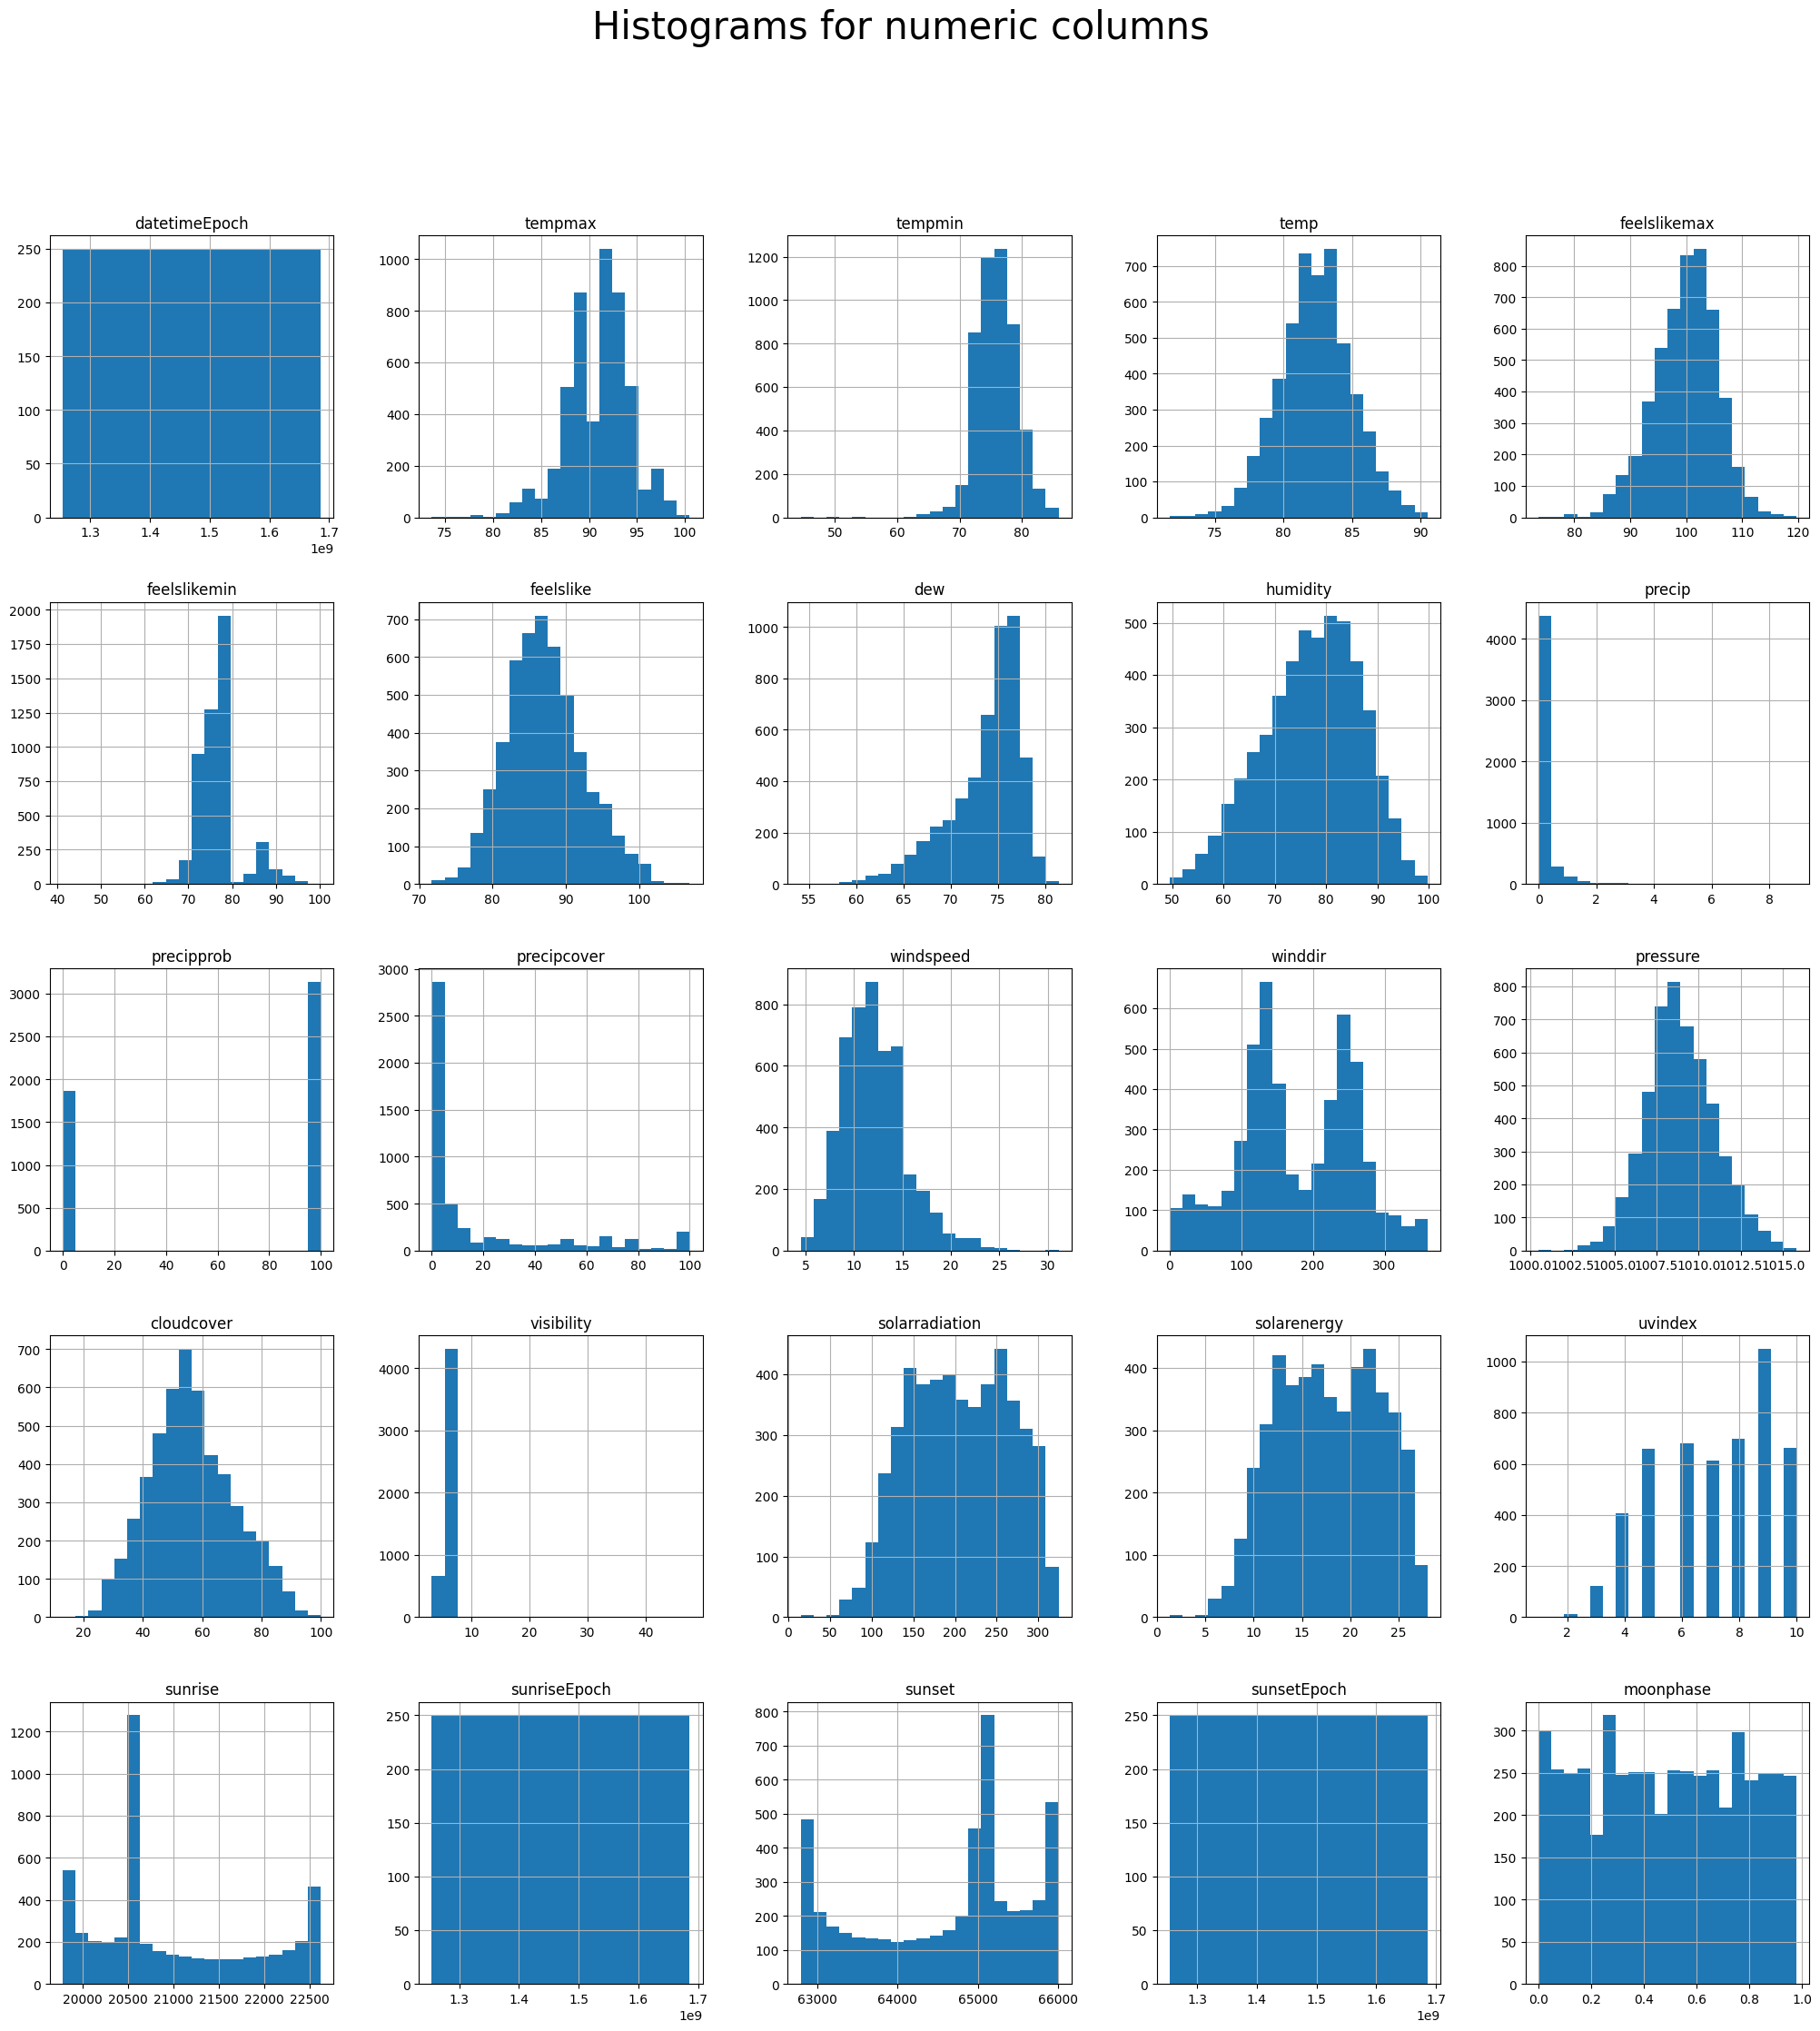

In [105]:
# Visualize histograms for further understanding
raw_data_numeric.hist(bins=20, figsize=(25, 25))
plt.suptitle('Histograms for numeric columns', fontsize=30)
plt.show()

- Using `density plot`

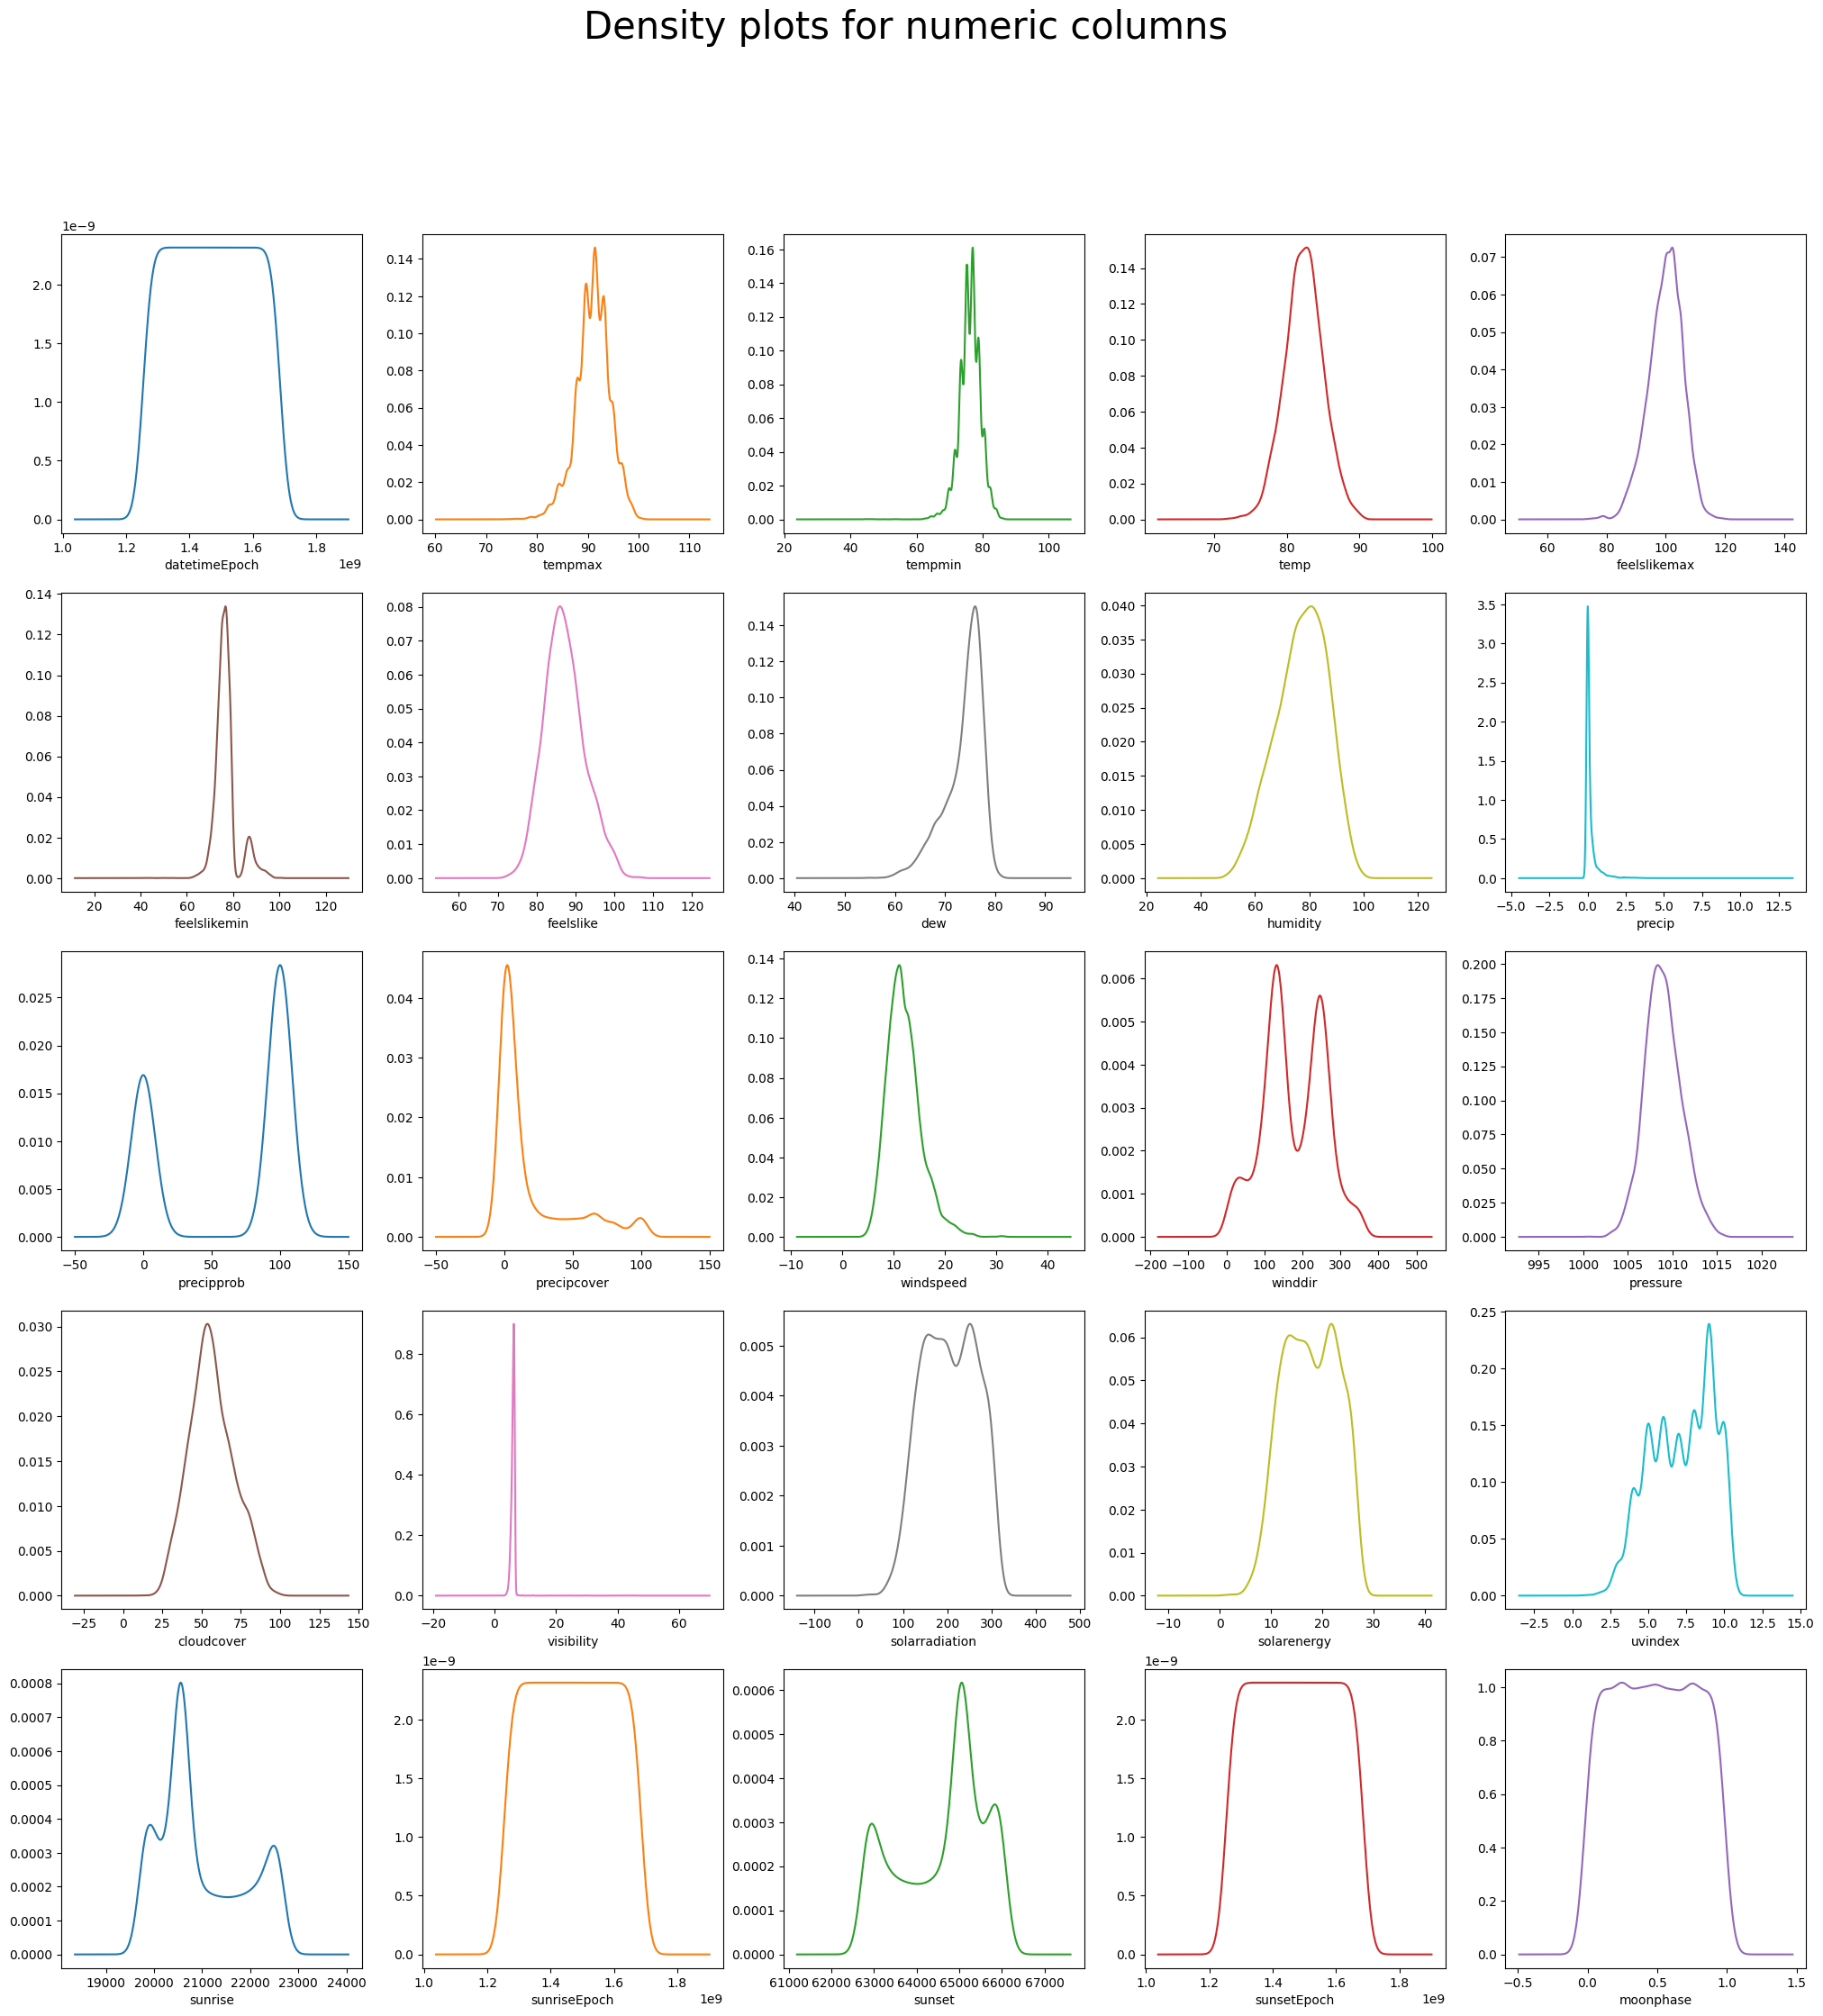

In [107]:
raw_data_numeric.plot.density(subplots=True, layout=(5, 5), sharex=False, figsize=(25, 25), legend=False)

# Loop over each subplot and remove the y-label
for i, ax in enumerate(plt.gcf().get_axes()):
    ax.set_xlabel(list(raw_data_numeric.columns)[i])
    ax.set_ylabel('')
plt.suptitle('Density plots for numeric columns', fontsize=30)
plt.show()

**Comment about numerical features:** <br>
- `datetimeEpoch`, `sunriseEpoch` and `sunsetEpoch` are the number of seconds elapsed since 1/1/1970 for the current point in time, so they are likely to have many different values. However, in terms of their meaning, we don't need to pay attention to these values (it may be noted to delete them). We only need to focus on the `datetime`, `sunrise`, and `sunset` columns.
- `tempmax`, `tempmin`, `temp`, `feelslikemin`,  `feelslike`, `dew`, `humidity`, `precip`, `precipprob`, `precipcover`, `windspeed`, `winddir`, `visibility`,`solarradiation`, `solarenergy`, `uvindex`, `sunrise`, `sunset` and `moonphase` have skewed distributions and need to be processed to have a more normal distribution. Depending on each case, we will apply different methods: for data with a large range, `scaling` should be used, while for columns with very few values or values skewed towards one side, `binning` should be considered. Additionally, there are other methods available. The specific approach will be carried out in the `preprocessing phase`.
- `feelslikemax`, `pressure` and `cloudcover` have distributions that are close to a normal distribution, so they may not require any processing.

### 5.3 Categorical Data

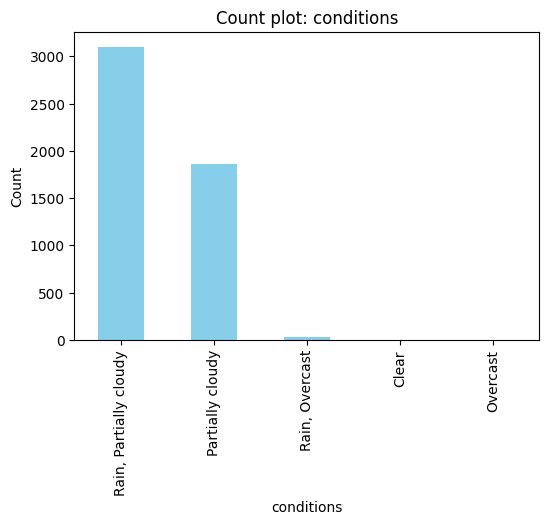

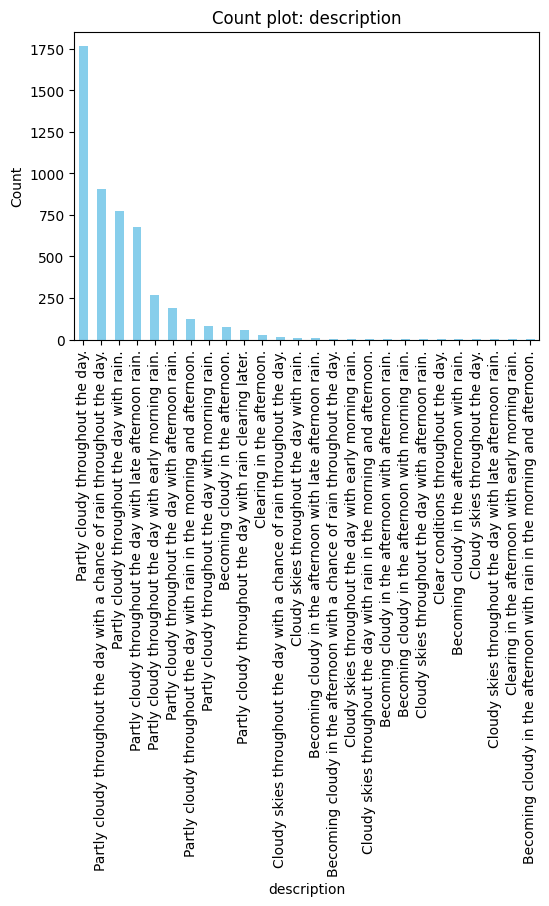

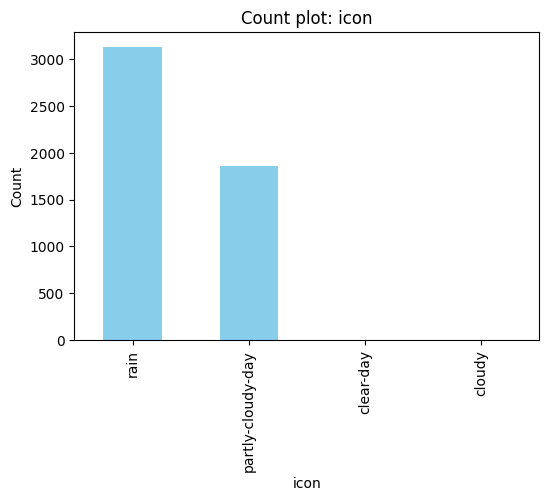

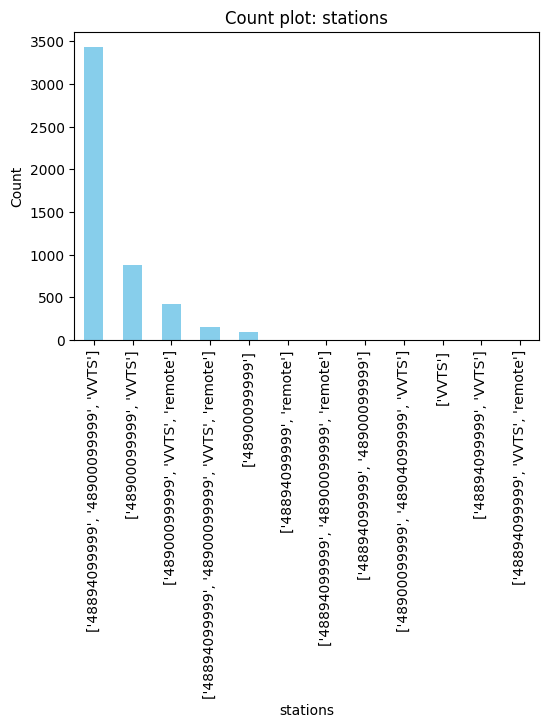

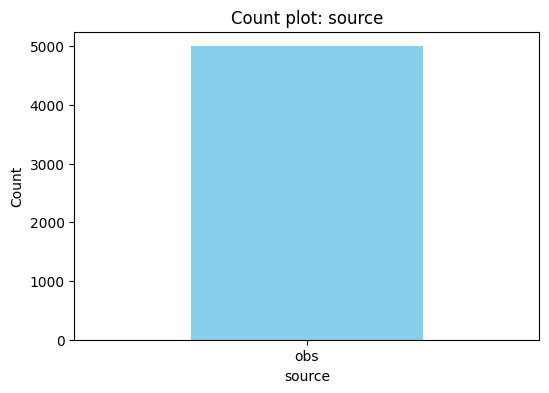

In [118]:
# Plot column chart for each categorical column
for column in list(raw_data_categorical.columns):
    if column in ['datetime']:
        continue        
    
    value_counts = raw_data_categorical[column].value_counts()
    
    # Plotting
    plt.figure(figsize=(6, 4))
    value_counts.plot(kind='bar', color='skyblue')
    
    # Adding labels and title
    plt.ylabel('Count')
    plt.title(f'Count plot: {column}')
    
    if column == 'source':
        plt.xticks(rotation=0)
    
    # Show the plot
    plt.show()

**Comment:** <br>
- Since `source` has only one unique value, it should be removed during the `preprocessing stage`.
- `description` provides more detailed information compared to `conditions` and `icon`, so we can combine the values from these columns to **create a new column** with fewer unique values while preserving the meaning.
- `stations` contains relatively complex and meaningless values, so we can also remove this column during the preprocessing stage.

### 5.4 Abnormal data and Outliers

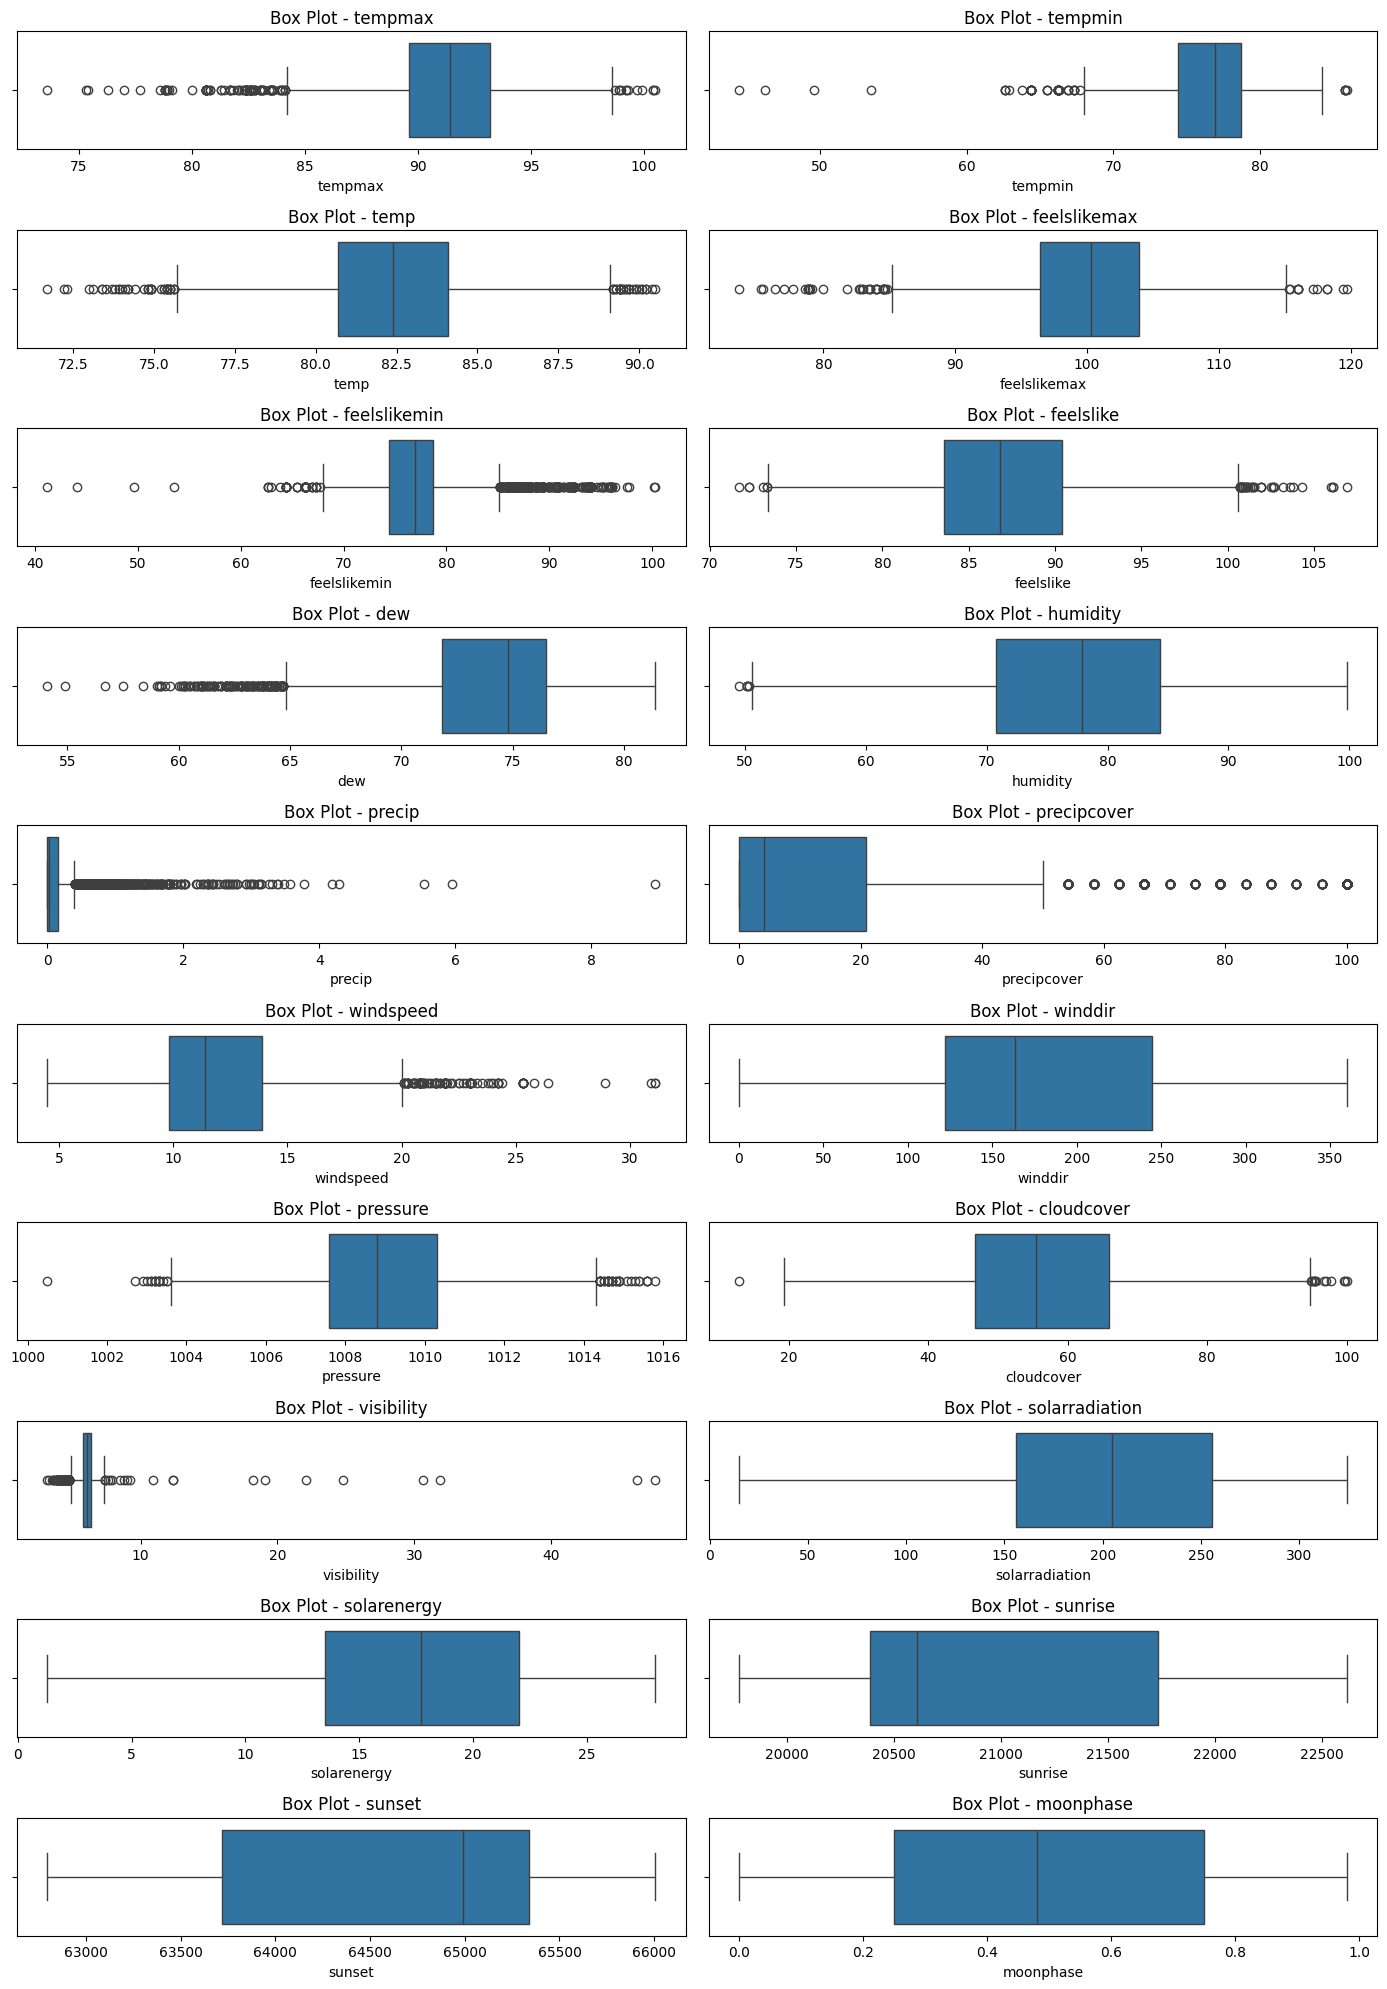

In [92]:
# Select four columns for the box plot
columns_to_plot = ['tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip',
       'precipcover', 'windspeed', 'winddir', 'pressure', 'cloudcover',
       'visibility', 'solarradiation', 'solarenergy', 'sunrise'
       , 'sunset', 'moonphase']

# Create subplots with 2 rows and 2 columns
fig, axes = plt.subplots(nrows=10, ncols=2, figsize=(14, 20))

# Flatten the 2D array of axes to 1D
axes = axes.flatten()

# Create a box plot for each selected column
for i, column in enumerate(columns_to_plot):
    sns.boxplot(x=raw_data_numeric[column], ax=axes[i])
    axes[i].set_title(f'Box Plot - {column}')

# Adjust layout
plt.tight_layout()
plt.show()

**Comment:** <br>
- `winddir`, `solarradiation`, `solarenergy`, `sunrise`, `sunset` and `moonphase` do not have any outliers. It's **good** because we can not worry about them.
- Other columns have outliers. We will **handle** them in the `preprocessing phase`.

## 6. Correlation Analysis
-  The `Pearson correlation coefficient` does not have the ability to assess monotonic relationships between two variables (both linear and nonlinear). In this case, we need a better metric to measure this type of relationship. One such metric is the `Spearman correlation coefficient`.
- `Pearson` and `Spearman` correlations are similar when it comes to assessing linear relationships.
- `Spearman` is better at estimating monotonic (but nonlinear) relationships between variables, while `Pearson` tends to underestimate this type of relationship.

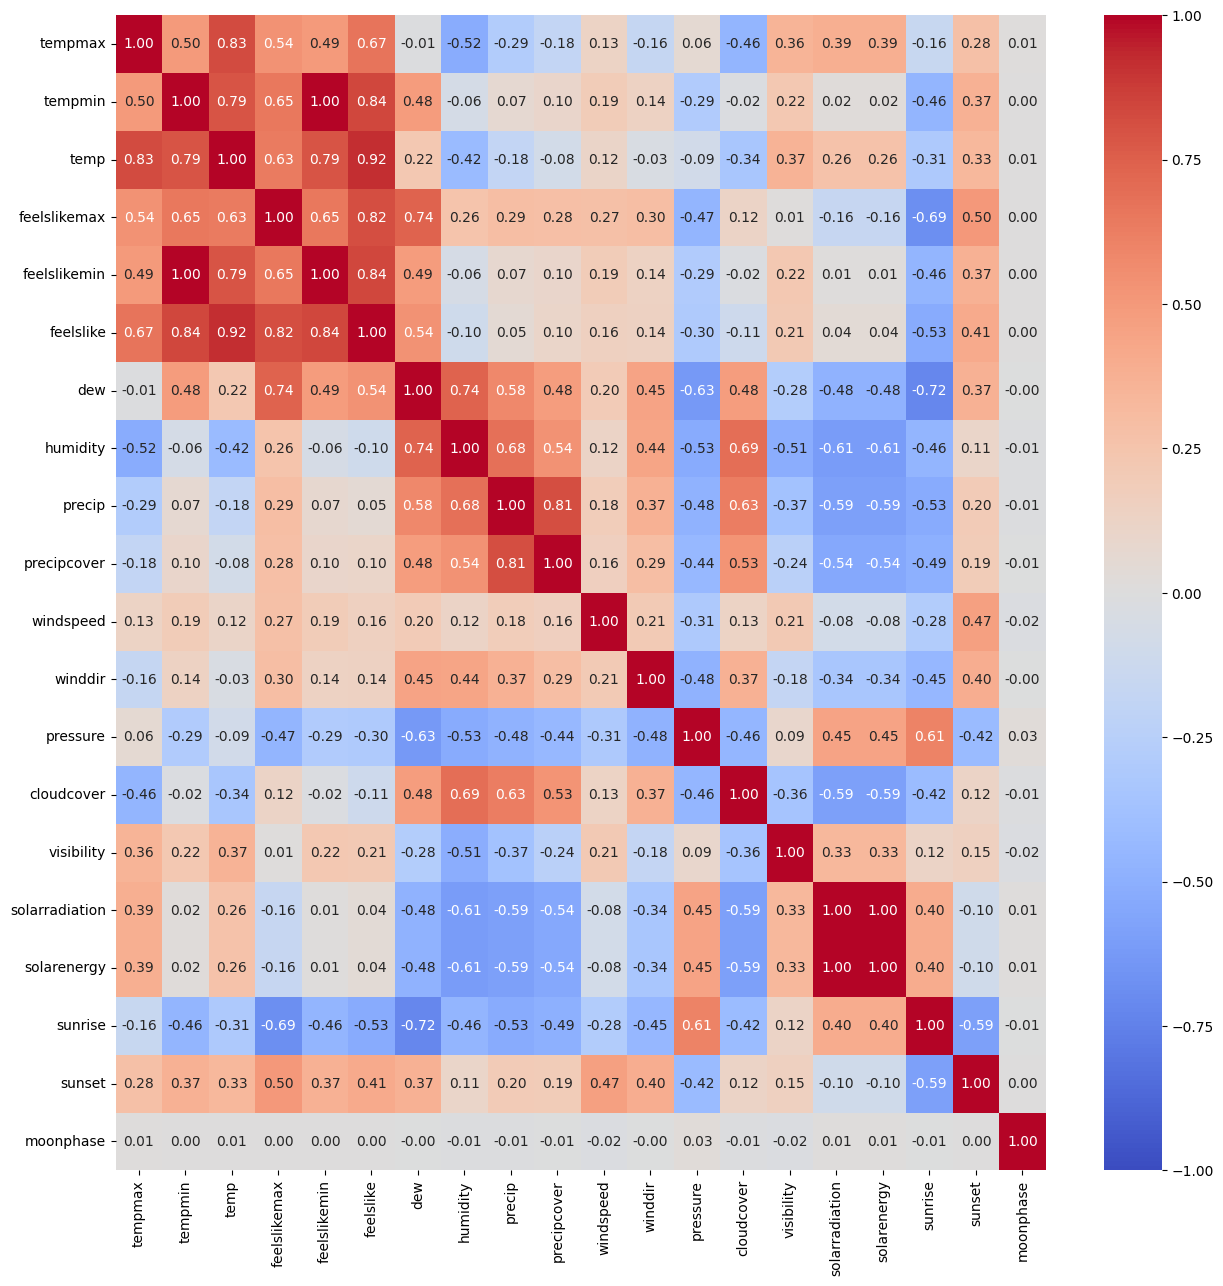

In [131]:
corr_matrix = raw_data[columns_to_plot].corr(method='spearman')
#mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(15, 15))        
sns.heatmap(corr_matrix, annot=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm')
plt.show()

**Comment:** <br>
- `moonphase` has very **weak correlation** with all other columns.
- `tempmin`, `tempmax`, `temp`, `feelslikemax`, `feelslikemin`, `feelslike` have a **strong correlation** with each other, evident from the color of the correlation matrix for these 6 attributes. This is understandable because these attributes are all related to temperature. So in the `preprocessing phase`, we can think about **removing** some of these columns to avoid **multicollinearity**.
- The remaining attributes do not have prominent correlations with each other. However, since this is raw data, we **cannot fully evaluate** the correlations between all attributes. Therefore, the heatmap, apart from showing us that `moonphase` has **weak correlation** with the other attributes and `tempmin, tempmax, temp, feelslikemax, feelslikemin, and feelslike` have **strong correlations** with each other, does not provide much additional meaningful information. In the `preprocessing phase`, we will delve deeper into this issue.

---
<p style="text-align:center; font-size:30px;">END</p>